In [1]:
import numpy as np
import p2BoundaryConditions as bc
import p2FEMProblem as fp

## 4.1: Temperature distribution of a slab
- Description: 
    - Concrete slab 0.5m thick 
    - Warm air temperatures on the exterior (at x = 0)
    - Cooler air temperatures on the interior (at x = L)
    - What is the temperature of the concrete on both the interior and the exterior wall surfaces?
- DE: 
    - $\kappa u_{xx} + f = 0$ on $\Omega$
- BCs
    - LHS=exterior ($x=0$): $\quad \omega u(0) - \kappa u_x(0) = \omega u_\infty$
    - RHS=interior ($x=L$): $\quad \hat{\omega} u(L) - \kappa u_x(L) = \hat{\omega}\hat{u}_\infty$

<!-- end with x=0 is insulated: $u_x(0) = 0$ -->

- Constants
    - $u_\infty = 303.15 K$ (the exterior (x=0) uniform fluid temperature ($\approx$ 80 F))
    - $\hat{u}_\infty = 293.15 K$ (the interior (x=L) uniform fluid temperature ($\approx$ 60 F))
    - $f = 0 W\cdot m^{3}$ (the rate of heat generation per unit volume)
    - $\omega = \hat{\omega} = 2.2 $ (the surface heat transfer coefficient)
    - $\kappa = 2.711 W\cdot m^{-1}\cdot K^{-1}$
    
- Unknowns/QOIs: 
    - $u(x)$ = temperature as a function of $x$
    - $u(0)$ = QOI
    - $u(L)$ = QOI


<!-- 1. Rewriting the DE to solve for $f$ in terms of $\kappa$ and temp placeholder $q$: 
\begin{align}
\kappa u_{xx} + q \quad &= \quad 0  \\
\kappa u_{xx} \quad &= \quad  -q  \\ 
u_{xx} \quad &= \quad  -\frac{q}{\kappa}  \\
u_{xx} + \frac{q}{\kappa} \quad &= \quad  0  \\
\end{align} -->

<!-- 3. Solving for BCs:
\begin{align}
\omega u(0) - \kappa u_x(0)\quad &= \quad\omega u_\infty  \\
XX \quad &= \quad XX \\
XX \quad &= \quad XX \\
XX \quad &= \quad XX \\
XX \quad &= \quad XX \\
\end{align} -->

In [6]:
# BC data
kappa = 2.711
omega = 2.2
omegahat = omega
uinf = 303.15
uinfhat = 293.15

bcl = bc.BoundaryCondition("left", "Rob", omega, kappa, omega * uinf)
bcr = bc.BoundaryCondition("right", "Rob", omegahat, kappa, omegahat * uinfhat)

f = lambda x: 0

p1 = fp.Problem(bcl, bcr, f, 100)

In [7]:
s = p1.SolveOnly()

In [8]:
# print(s.D_plot)

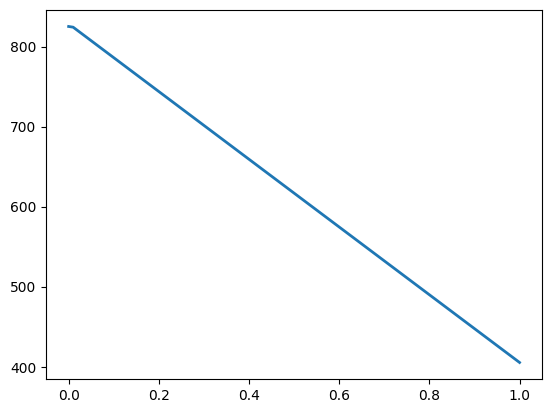

In [9]:
p1.PlotSolution()